# Basic Convertion and Calc.

In [1]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Text(0.5, 1.0, 'RGB')

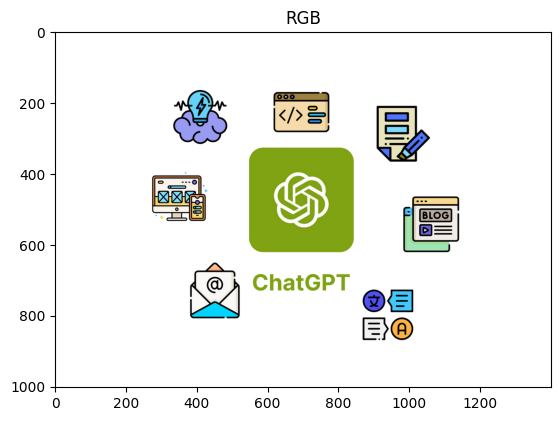

In [3]:
Img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Machine Vision/images_data/0_MeYWEI02F47h0eSa.png")
plt.imshow(Img)
plt.title('RGB')

In [4]:
print(type(Img),"\n")
Img.shape

<class 'numpy.ndarray'> 



(1002, 1400, 3)

Text(0.5, 1.0, 'BGR to RGB')

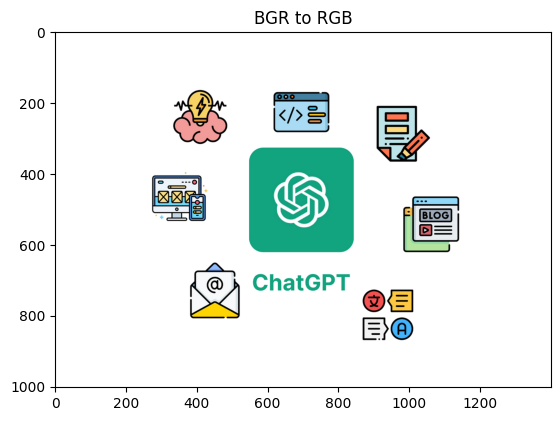

In [5]:
Img_rgb = cv2.cvtColor(Img,cv2.COLOR_BGR2RGB)
plt.imshow(Img_rgb)
plt.title('BGR to RGB')

Text(0.5, 1.0, 'RGB to HSV')

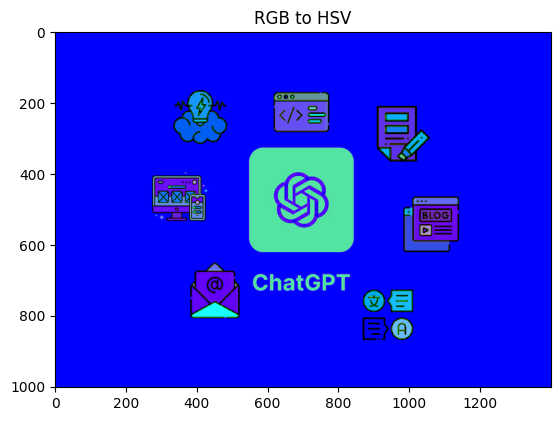

In [6]:
Img_hsv = cv2.cvtColor(Img_rgb,cv2.COLOR_RGB2HSV)
plt.imshow(Img_hsv)
plt.title('RGB to HSV')

Text(0.5, 1.0, 'RGB to BGR')

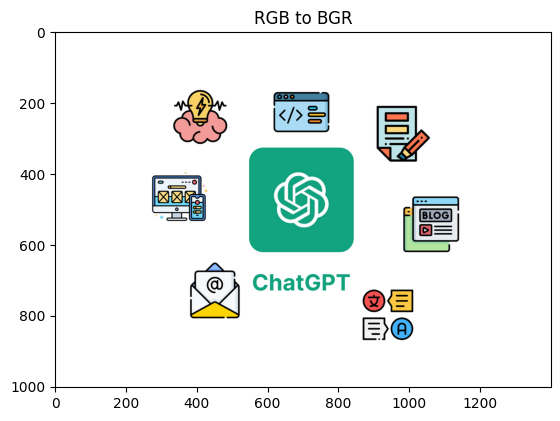

In [7]:
Img_bgr = cv2.cvtColor(Img,cv2.COLOR_RGB2BGR)
plt.imshow(Img_bgr)
plt.title('RGB to BGR')

Text(0.5, 1.0, 'RGB to GRAY')

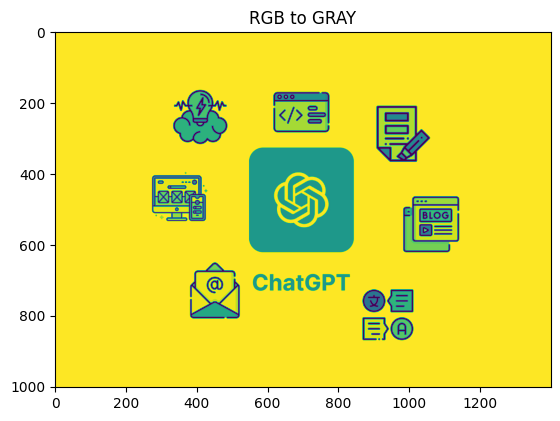

In [8]:
Img_grey = cv2.cvtColor(Img,cv2.COLOR_RGB2GRAY)
plt.imshow(Img_grey)
plt.title('RGB to GRAY')

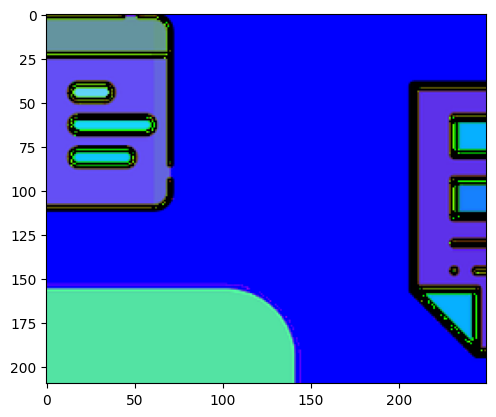

In [9]:
#Cropped image
plt.imshow(Img_hsv[170:380,700:950])

Text(0.5, 1.0, 'Brightned')

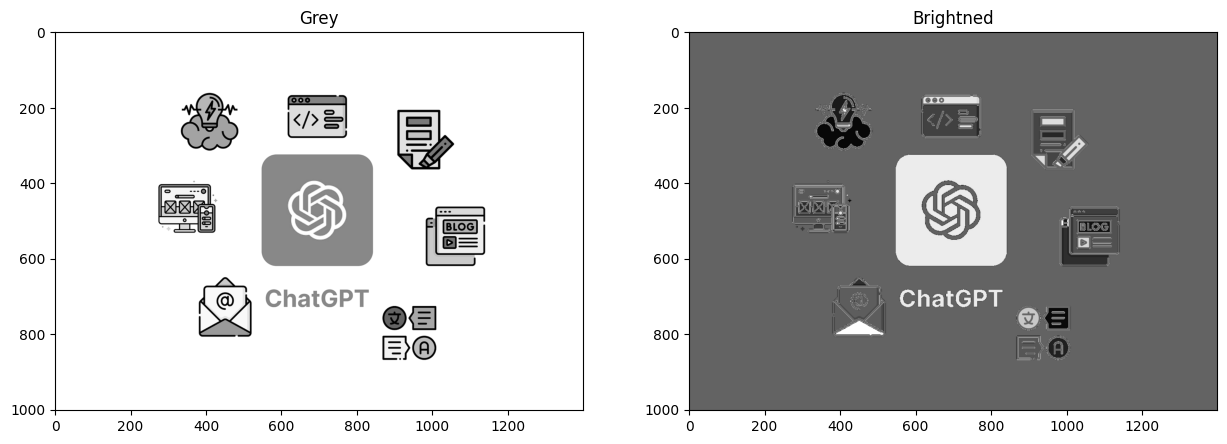

In [10]:
Img_ib = Img_grey+100
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(Img_grey,cmap='gray')
plt.title("Grey")
plt.subplot(1,2,2)
plt.imshow(Img_ib,cmap='gray')
plt.title("Brightned")

Text(0.5, 1.0, 'Lower Brightness')

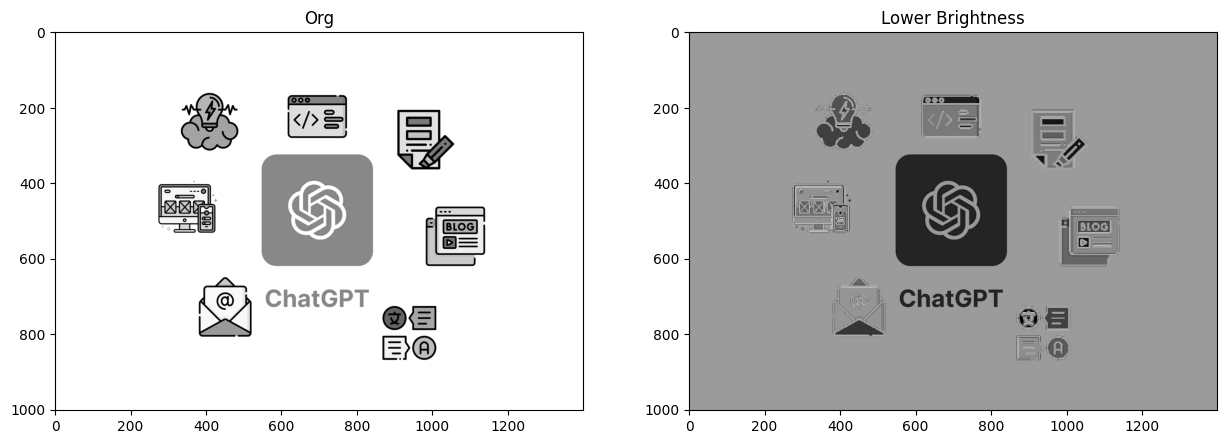

In [11]:
Img_db = Img_grey-100
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(Img_grey,cmap='gray')
plt.title('Org')

plt.subplot(1,2,2)
plt.imshow(Img_db,cmap='gray')
plt.title('Lower Brightness')

Text(0.5, 1.0, 'Negative')

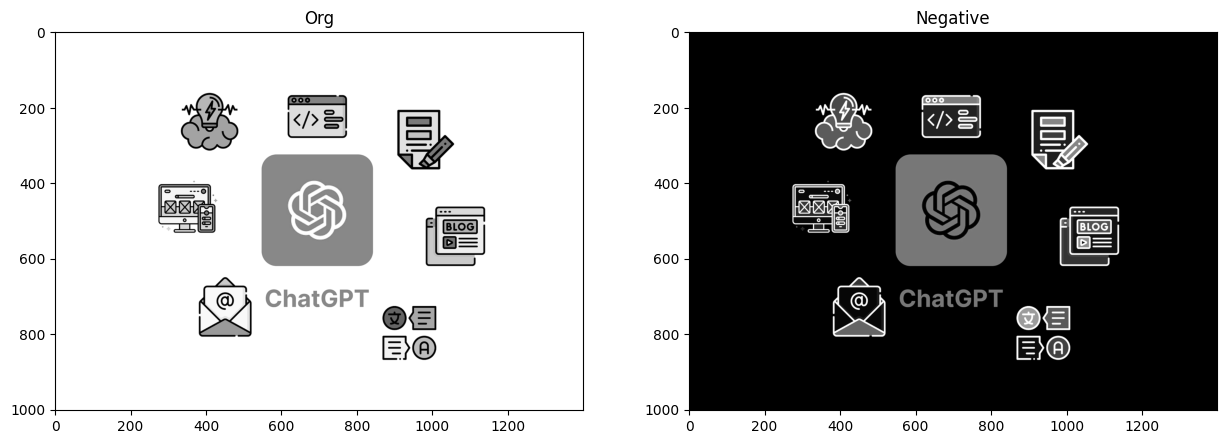

In [29]:
Img_neg = 255-Img_grey
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(Img_grey,cmap='gray')
plt.title("Org")
plt.subplot(1,2,2)
plt.imshow(Img_neg,cmap='gray')
plt.title("Negative")

In [13]:
#RED
Red_1 = Img_rgb[:,:,0]
Green_1 = Img_rgb[:,:,1]
Blue_1 = Img_rgb[:,:,2]

print("Red---",Red_1)
print("Red---",Green_1)
print("Red---",Blue_1)

Red--- [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Red--- [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Red--- [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [14]:
#max and min of RED
print(np.max(Red_1))
print(np.min(Red_1))
#max and min of GREEN
print(np.max(Green_1))
print(np.min(Green_1))
#max and min of Bluev
print(np.max(Blue_1))
print(np.min(Blue_1))

255
0
255
0
255
0


# Gamma Correction

In [15]:
def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)

In [17]:
img_bg = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Machine Vision/images_data/gamma_correction_example.jpg")
img_ag = gammaCorrection(img_bg,0.5)
img_ag2 = gammaCorrection(img_bg,1)
img_ag3 = gammaCorrection(img_bg,2)
img_ag4 = gammaCorrection(img_bg,2.5)

Text(0.5, 1.0, 'after Gamma (=2.5)')

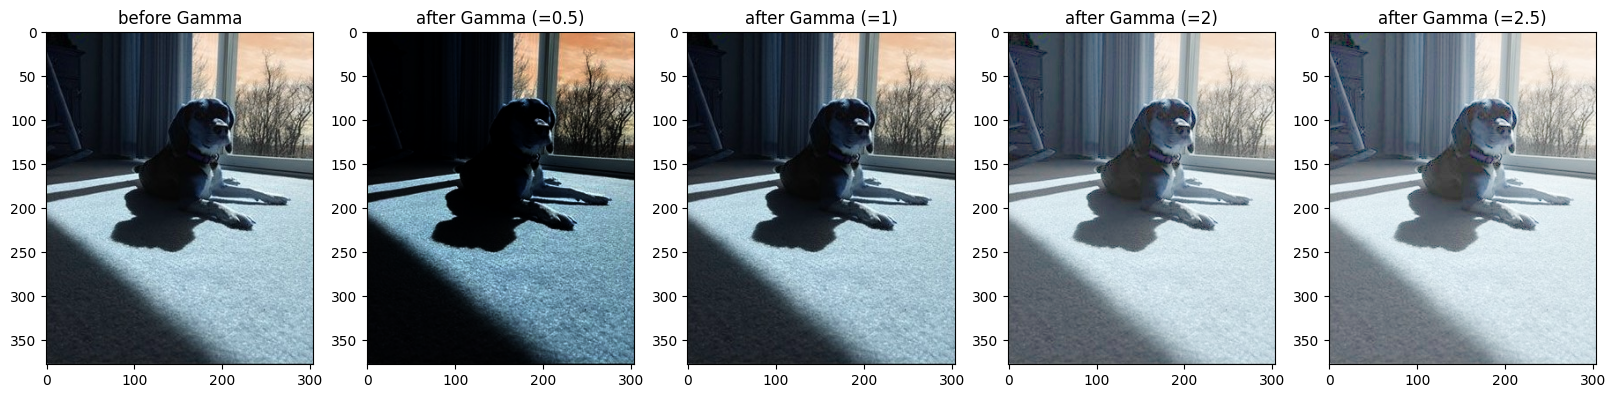

In [18]:
plt.figure(figsize=(20,20))
plt.subplot(1,5,1)
plt.imshow(img_bg)
plt.title("before Gamma")
plt.subplot(1,5,2)
plt.imshow(img_ag)
plt.title("after Gamma (=0.5)")
plt.subplot(1,5,3)
plt.imshow(img_ag2)
plt.title("after Gamma (=1)")
plt.subplot(1,5,4)
plt.imshow(img_ag3)
plt.title("after Gamma (=2)")
plt.subplot(1,5,5)
plt.imshow(img_ag4)
plt.title("after Gamma (=2.5)")

# Log Transformation

In [21]:
img_bf = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Machine Vision/images_data/applying_gamma_correction_using_opencv.png")

c1 = 255/np.log(1+np.max(img_bf))
c2 = 255/(np.max(img_bf)-np.min(img_bf))
c3 = (np.max(img_bf)-np.min(img_bf))/(np.max(img_bf)+np.min(img_bf))

img_lg_dash1 = c1*np.log(img_bf+1)
img_lg_dash2 = c2*np.log(img_bf+1)
img_lg_dash3 = c3*np.log(img_bf+1)

img_lg1 = np.array(img_lg_dash1,dtype=np.int8)
img_lg2 = np.array(img_lg_dash2,dtype=np.int8)
img_lg3 = np.array(img_lg_dash3,dtype=np.int8)

<ipython-input-21-44b57c51f438>:5: RuntimeWarning: overflow encountered in scalar add
  c3 = (np.max(img_bf)-np.min(img_bf))/(np.max(img_bf)+np.min(img_bf))
<ipython-input-21-44b57c51f438>:7: RuntimeWarning: divide by zero encountered in log
  img_lg_dash1 = c1*np.log(img_bf+1)
<ipython-input-21-44b57c51f438>:8: RuntimeWarning: divide by zero encountered in log
  img_lg_dash2 = c2*np.log(img_bf+1)
<ipython-input-21-44b57c51f438>:9: RuntimeWarning: divide by zero encountered in log
  img_lg_dash3 = c3*np.log(img_bf+1)
<ipython-input-21-44b57c51f438>:11: RuntimeWarning: invalid value encountered in cast
  img_lg1 = np.array(img_lg_dash1,dtype=np.int8)
<ipython-input-21-44b57c51f438>:12: RuntimeWarning: invalid value encountered in cast
  img_lg2 = np.array(img_lg_dash2,dtype=np.int8)
<ipython-input-21-44b57c51f438>:13: RuntimeWarning: invalid value encountered in cast
  img_lg3 = np.array(img_lg_dash3,dtype=np.int8)


Text(0.5, 1.0, 'after Log3')

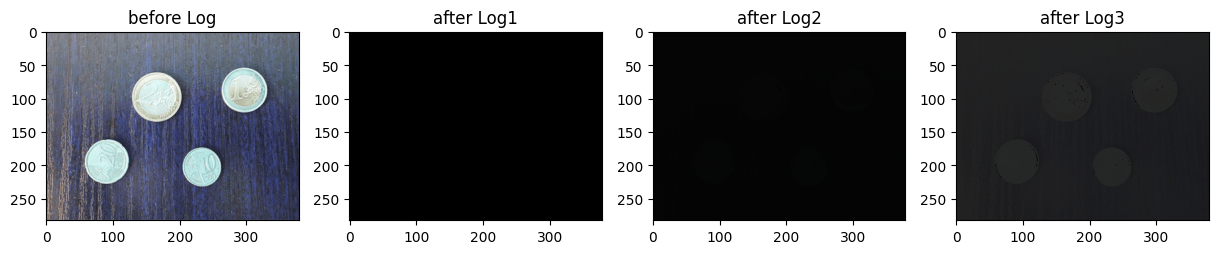

In [22]:
plt.figure(figsize=(15,15))
plt.subplot(1,4,1)
plt.imshow(img_bf)
plt.title("before Log")
plt.subplot(1,4,2)
plt.imshow(img_lg1)
plt.title("after Log1")
plt.subplot(1,4,3)
plt.imshow(img_lg2)
plt.title("after Log2")
plt.subplot(1,4,4)
plt.imshow(img_lg3)
plt.title("after Log3")

# Contrast Strecting

Text(0.5, 1.0, 'Stretched')

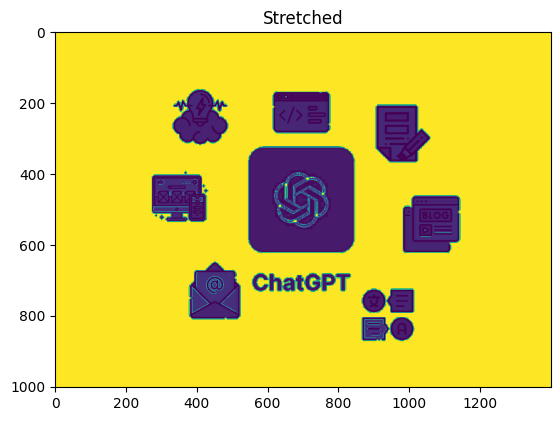

In [24]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Machine Vision/images_data/0_MeYWEI02F47h0eSa.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.title("Original")
hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf / cdf[-1]

img_stretched = cdf_normalized[img.flatten()]
img_stretched = np.reshape(img_stretched,img.shape)

plt.imshow(img_stretched)
plt.title("Stretched")

# Histogram Plot

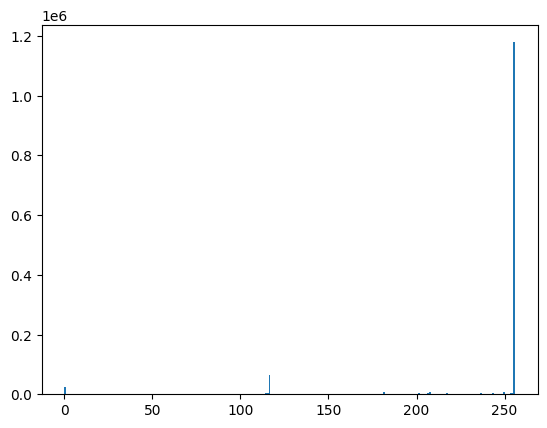

In [26]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Machine Vision/images_data/0_MeYWEI02F47h0eSa.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.hist(img.ravel(),256,[0,256])
plt.show()


# Histogram Equlization

In [27]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Machine Vision/images_data/0_MeYWEI02F47h0eSa.png", cv2.IMREAD_GRAYSCALE)
equ = cv2.equalizeHist(img)
# res = np.hstack((img,equ))

Text(0.5, 1.0, 'Histogram Equlizer')

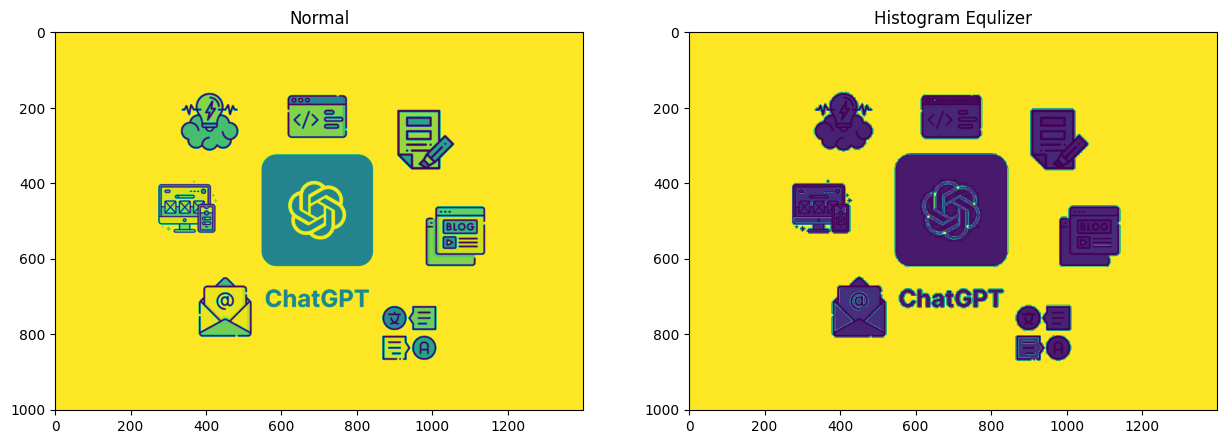

In [28]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Normal")
plt.subplot(1,2,2)
plt.imshow(equ)
plt.title("Histogram Equlizer")